In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
from itertools import combinations

from sklearn.preprocessing import StandardScaler
import torch

## Load the Data

In [2]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_6/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_6/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Input_3,Input_4,Input_5,Output
0,0.728186,0.154693,0.732552,0.693997,0.056401,-0.714265
1,0.242384,0.844100,0.577809,0.679021,0.501953,-1.209955
2,0.729523,0.748106,0.679775,0.356552,0.671054,-1.672200
3,0.770620,0.114404,0.046780,0.648324,0.273549,-1.536058
4,0.618812,0.331802,0.187288,0.756238,0.328835,-0.829237
5,0.784958,0.910682,0.708120,0.959225,0.004911,-1.247049
6,0.145111,0.896685,0.896322,0.726272,0.236272,-1.233786
7,0.945069,0.288459,0.978806,0.961656,0.598016,-1.694343
8,0.125720,0.862725,0.028544,0.246605,0.751206,-2.571170
9,0.757594,0.355831,0.016523,0.434207,0.112433,-1.309116


In [3]:
#Adicion de datos conforme el concurso ha avanzado

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Input_3':0.111111,'Input_4':0.111111,'Input_5':0.111111,'Output':-1.7915148}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# 5 may
new_data=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.72716766467499]
df.loc[len(df)] = new_data

new_data=[0.95,0.05,0.95,0.05,0.95,-2.7334412847328]
df.loc[len(df)] = new_data

# 14 may
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-0.98259880968994]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.31007611253924]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.722297629]

# 17 may
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.291393562]

# 20 may
df.loc[len(df)]=[0.68421,0.263158,0.631579,0.736842,0.105264,-0.404468625]
df.loc[len(df)]=[5.26316e-01,2.10527e-01,6.84210e-01,8.42105e-01,1.00000e-06,-0.497390102]

# 2 JUN
df.loc[len(df)]=[5.78947e-01,2.10527e-01,7.36842e-01,7.89473e-01,1.00000e-06,-0.523769199]


# 13 jun
df.loc[len(df)]=[6.31579e-01,1.57895e-01,7.36842e-01,7.36842e-01,1.00000e-06,-0.675173528]
df.loc[len(df)]=[0.421053,0.368421,0.578947,0.68421,0.105264,-0.19991057]



#Print
df

,Input_1,Input_2,Input_3,Input_4,Input_5,Output
0,0.728186,0.154693,0.732552,0.693997,0.056401,-0.714265
1,0.242384,0.844100,0.577809,0.679021,0.501953,-1.209955
2,0.729523,0.748106,0.679775,0.356552,0.671054,-1.672200
3,0.770620,0.114404,0.046780,0.648324,0.273549,-1.536058
4,0.618812,0.331802,0.187288,0.756238,0.328835,-0.829237
5,0.784958,0.910682,0.708120,0.959225,0.004911,-1.247049
6,0.145111,0.896685,0.896322,0.726272,0.236272,-1.233786
7,0.945069,0.288459,0.978806,0.961656,0.598016,-1.694343
8,0.125720,0.862725,0.028544,0.246605,0.751206,-2.571170
9,0.757594,0.355831,0.016523,0.434207,0.112433,-1.309116


In [4]:
df['OutputTransf']=(-1)*(1/df['Output'])
df

,Input_1,Input_2,Input_3,Input_4,Input_5,Output,OutputTransf
0,0.728186,0.154693,0.732552,0.693997,0.056401,-0.714265,1.400041
1,0.242384,0.844100,0.577809,0.679021,0.501953,-1.209955,0.826477
2,0.729523,0.748106,0.679775,0.356552,0.671054,-1.672200,0.598015
3,0.770620,0.114404,0.046780,0.648324,0.273549,-1.536058,0.651017
4,0.618812,0.331802,0.187288,0.756238,0.328835,-0.829237,1.205929
5,0.784958,0.910682,0.708120,0.959225,0.004911,-1.247049,0.801893
6,0.145111,0.896685,0.896322,0.726272,0.236272,-1.233786,0.810513
7,0.945069,0.288459,0.978806,0.961656,0.598016,-1.694343,0.590199
8,0.125720,0.862725,0.028544,0.246605,0.751206,-2.571170,0.388928
9,0.757594,0.355831,0.016523,0.434207,0.112433,-1.309116,0.763874


# Function 6: Cake and Stuff
### Time to get cooking! You are optimising a cake recipe. There are five ingredients. The outputs correspond to the sum of different objectives: flavor, consistency, calories, waste and cost. Each objective receives negative points by our expert taster. You want this sum to be as close to zero as possible!

## Data exploration

In [5]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
         Input_1    Input_2    Input_3    Input_4    Input_5     Output  \
count  32.000000  32.000000  32.000000  32.000000  32.000000  32.000000   
mean    0.536795   0.419051   0.492209   0.549648   0.368822  -1.461469   
std     0.314582   0.317103   0.326526   0.328235   0.348594   0.704632   
min     0.000500   0.000001   0.000001   0.000001   0.000001  -3.310076   
25%     0.234420   0.157094   0.168244   0.234122   0.067588  -1.758040   
50%     0.598880   0.320292   0.578378   0.679768   0.254911  -1.446370   
75%     0.773685   0.739480   0.736842   0.764547   0.628985  -0.970888   
max     0.999999   0.931871   0.999999   0.999999   0.999999  -0.199911   

       OutputTransf  
count     32.000000  
mean       0.983196  
std        0.891018  
min        0.302108  
25%        0.568883  
50%        0.694055  
75%        1.030446  
max        5.002237  

Missing values in the dataset:
Input_1         0
Input_2         0
Input_3         0
Input_4      

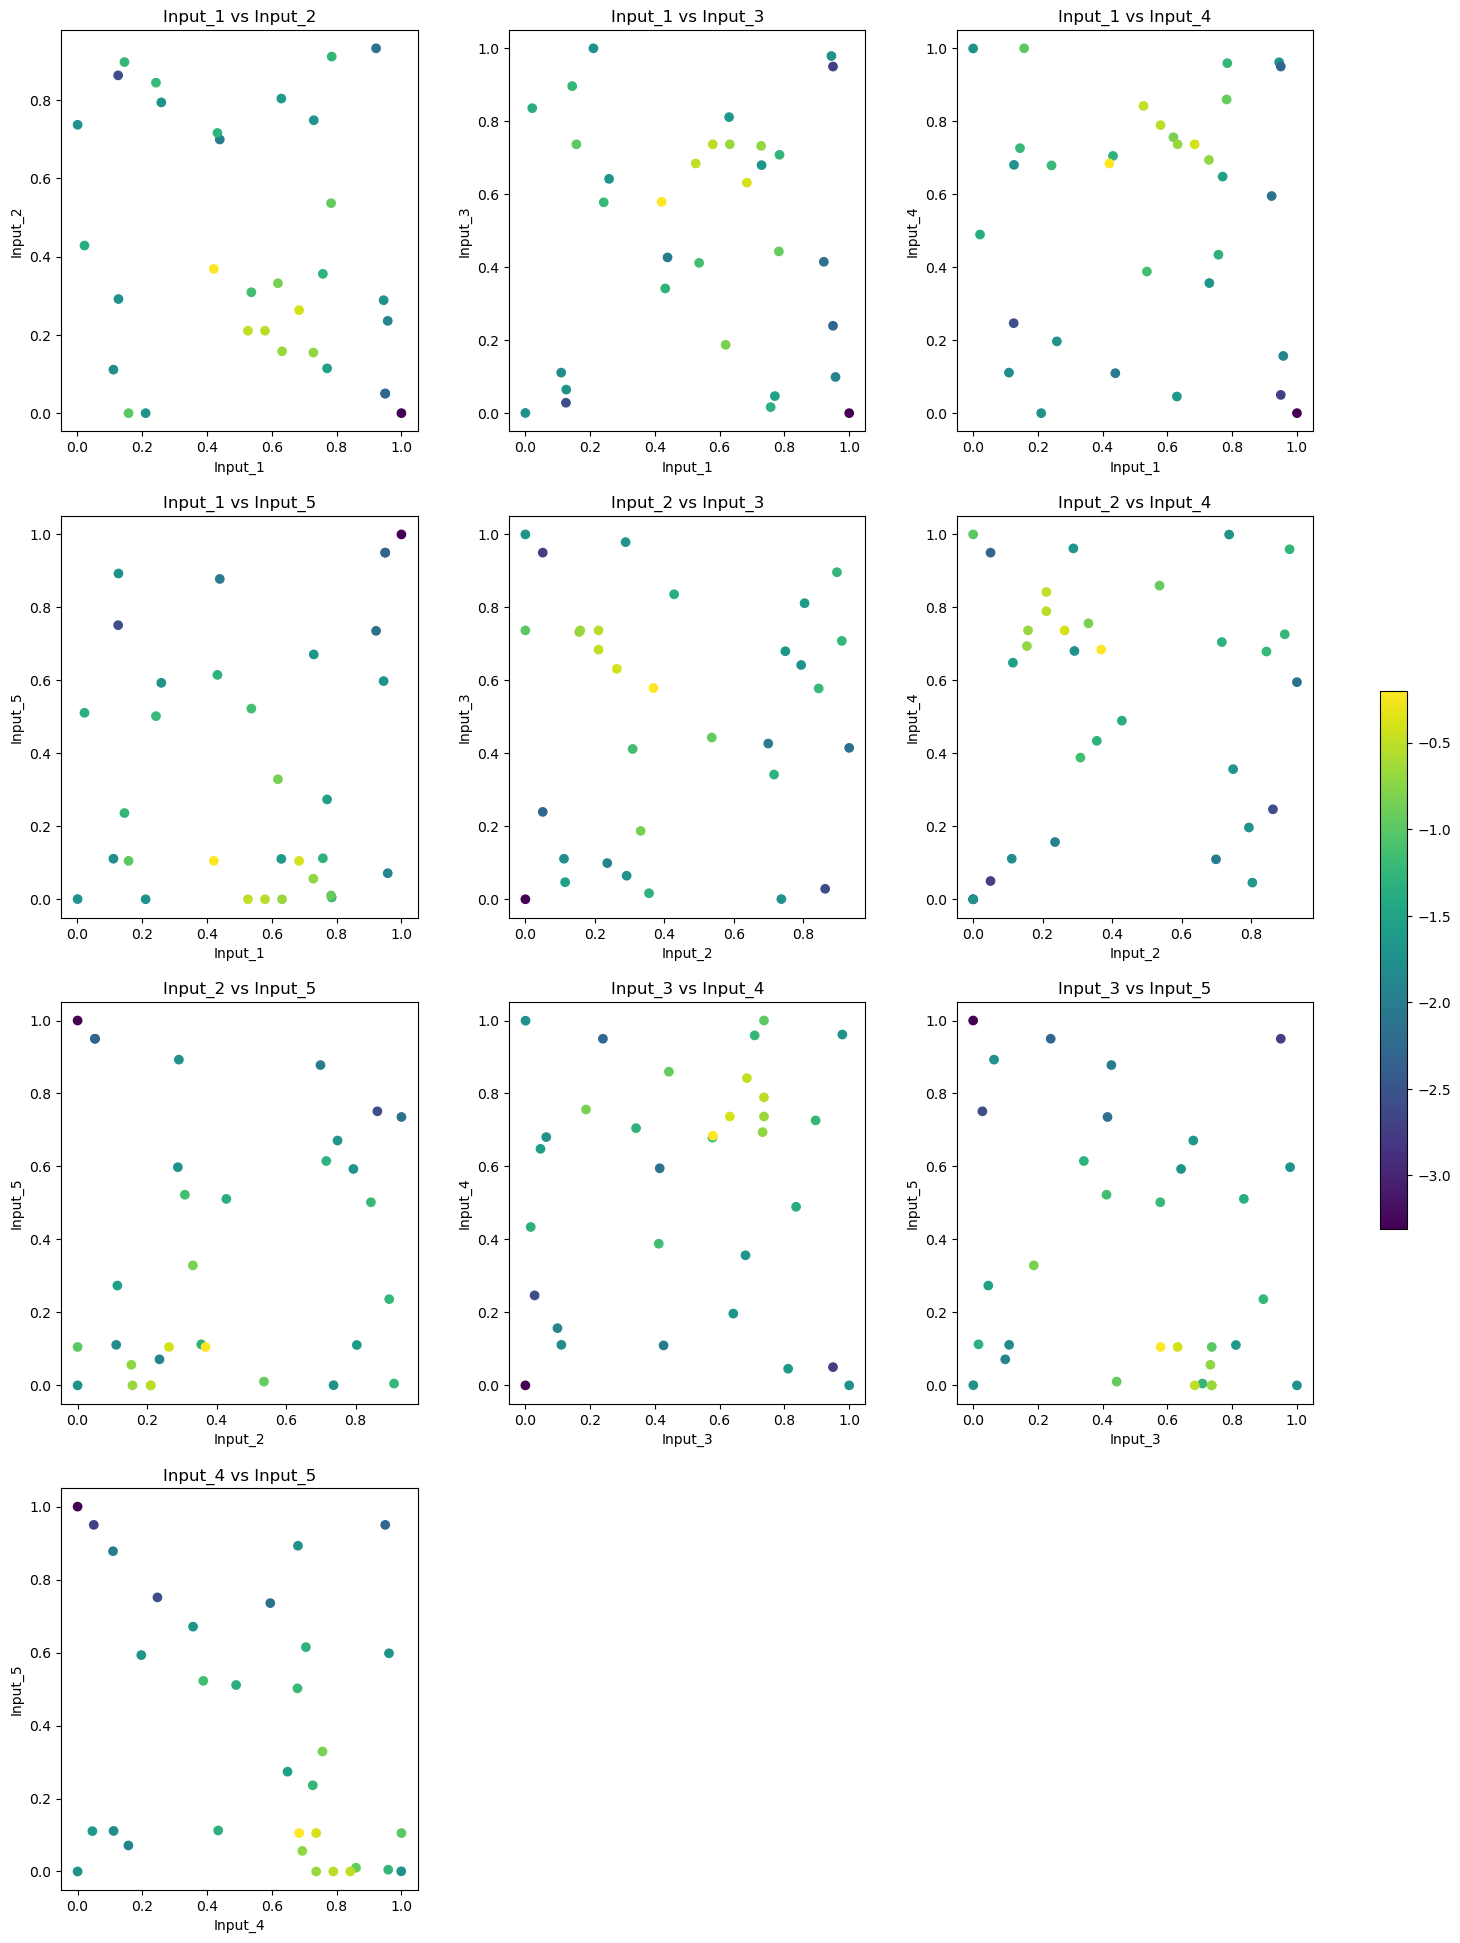

In [6]:
from itertools import combinations

# Calculate all pair combinations of input columns
input_columns = df.columns[df.columns.str.startswith('Input')]  # Select only columns that start with 'Input'
pair_combinations = list(combinations(input_columns, 2))  # Get all combinations of Input columns taken 2 at a time

# Determine the grid size for subplots
num_plots = len(pair_combinations)
num_cols = 3  # Set number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed, round up

# Create a figure with subplots in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))  # Adjust figure size as needed
fig.tight_layout(pad=4.0)  # Add spacing between plots

# Flatten axes array for easier iteration if it's 2D
axes = axes.flatten()

# Plotting each combination in the grid
for i, (x_col, y_col) in enumerate(pair_combinations):
    ax = axes[i]
    scatter = ax.scatter(df[x_col], df[y_col], c=df['Output'], cmap='viridis')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')

# Add a colorbar to the last plot
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=.02)

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

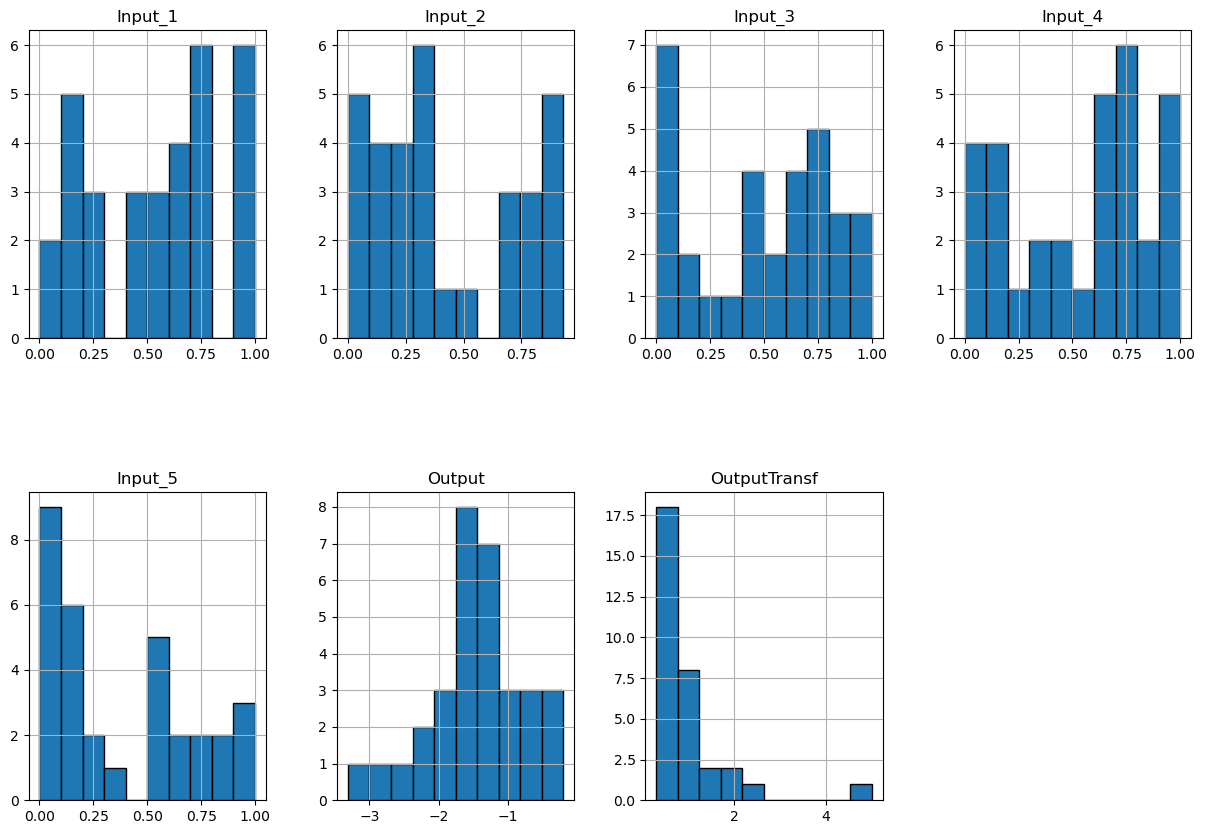

In [7]:
# Plot histograms for each column to understand distributions
df.hist(bins=10, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.show()

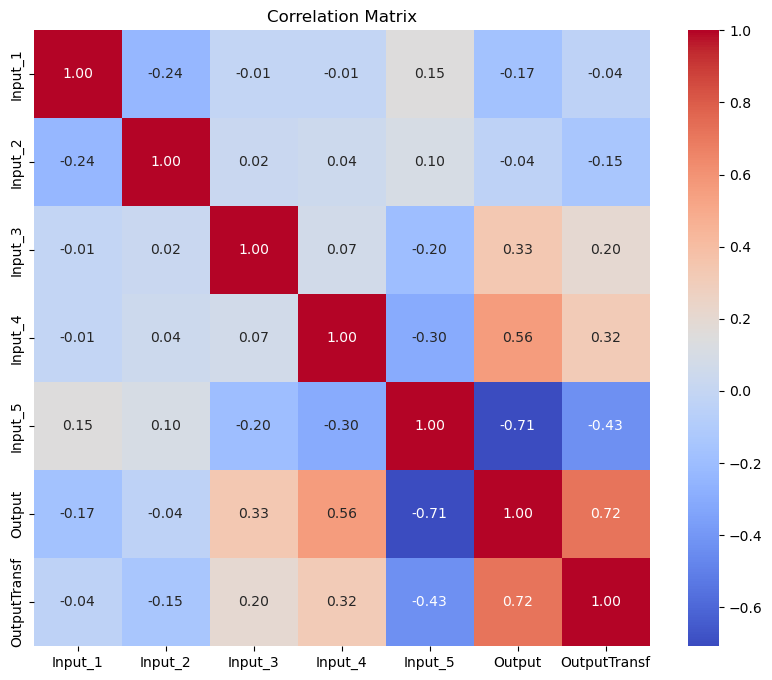

In [8]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

/Users/macponcho/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


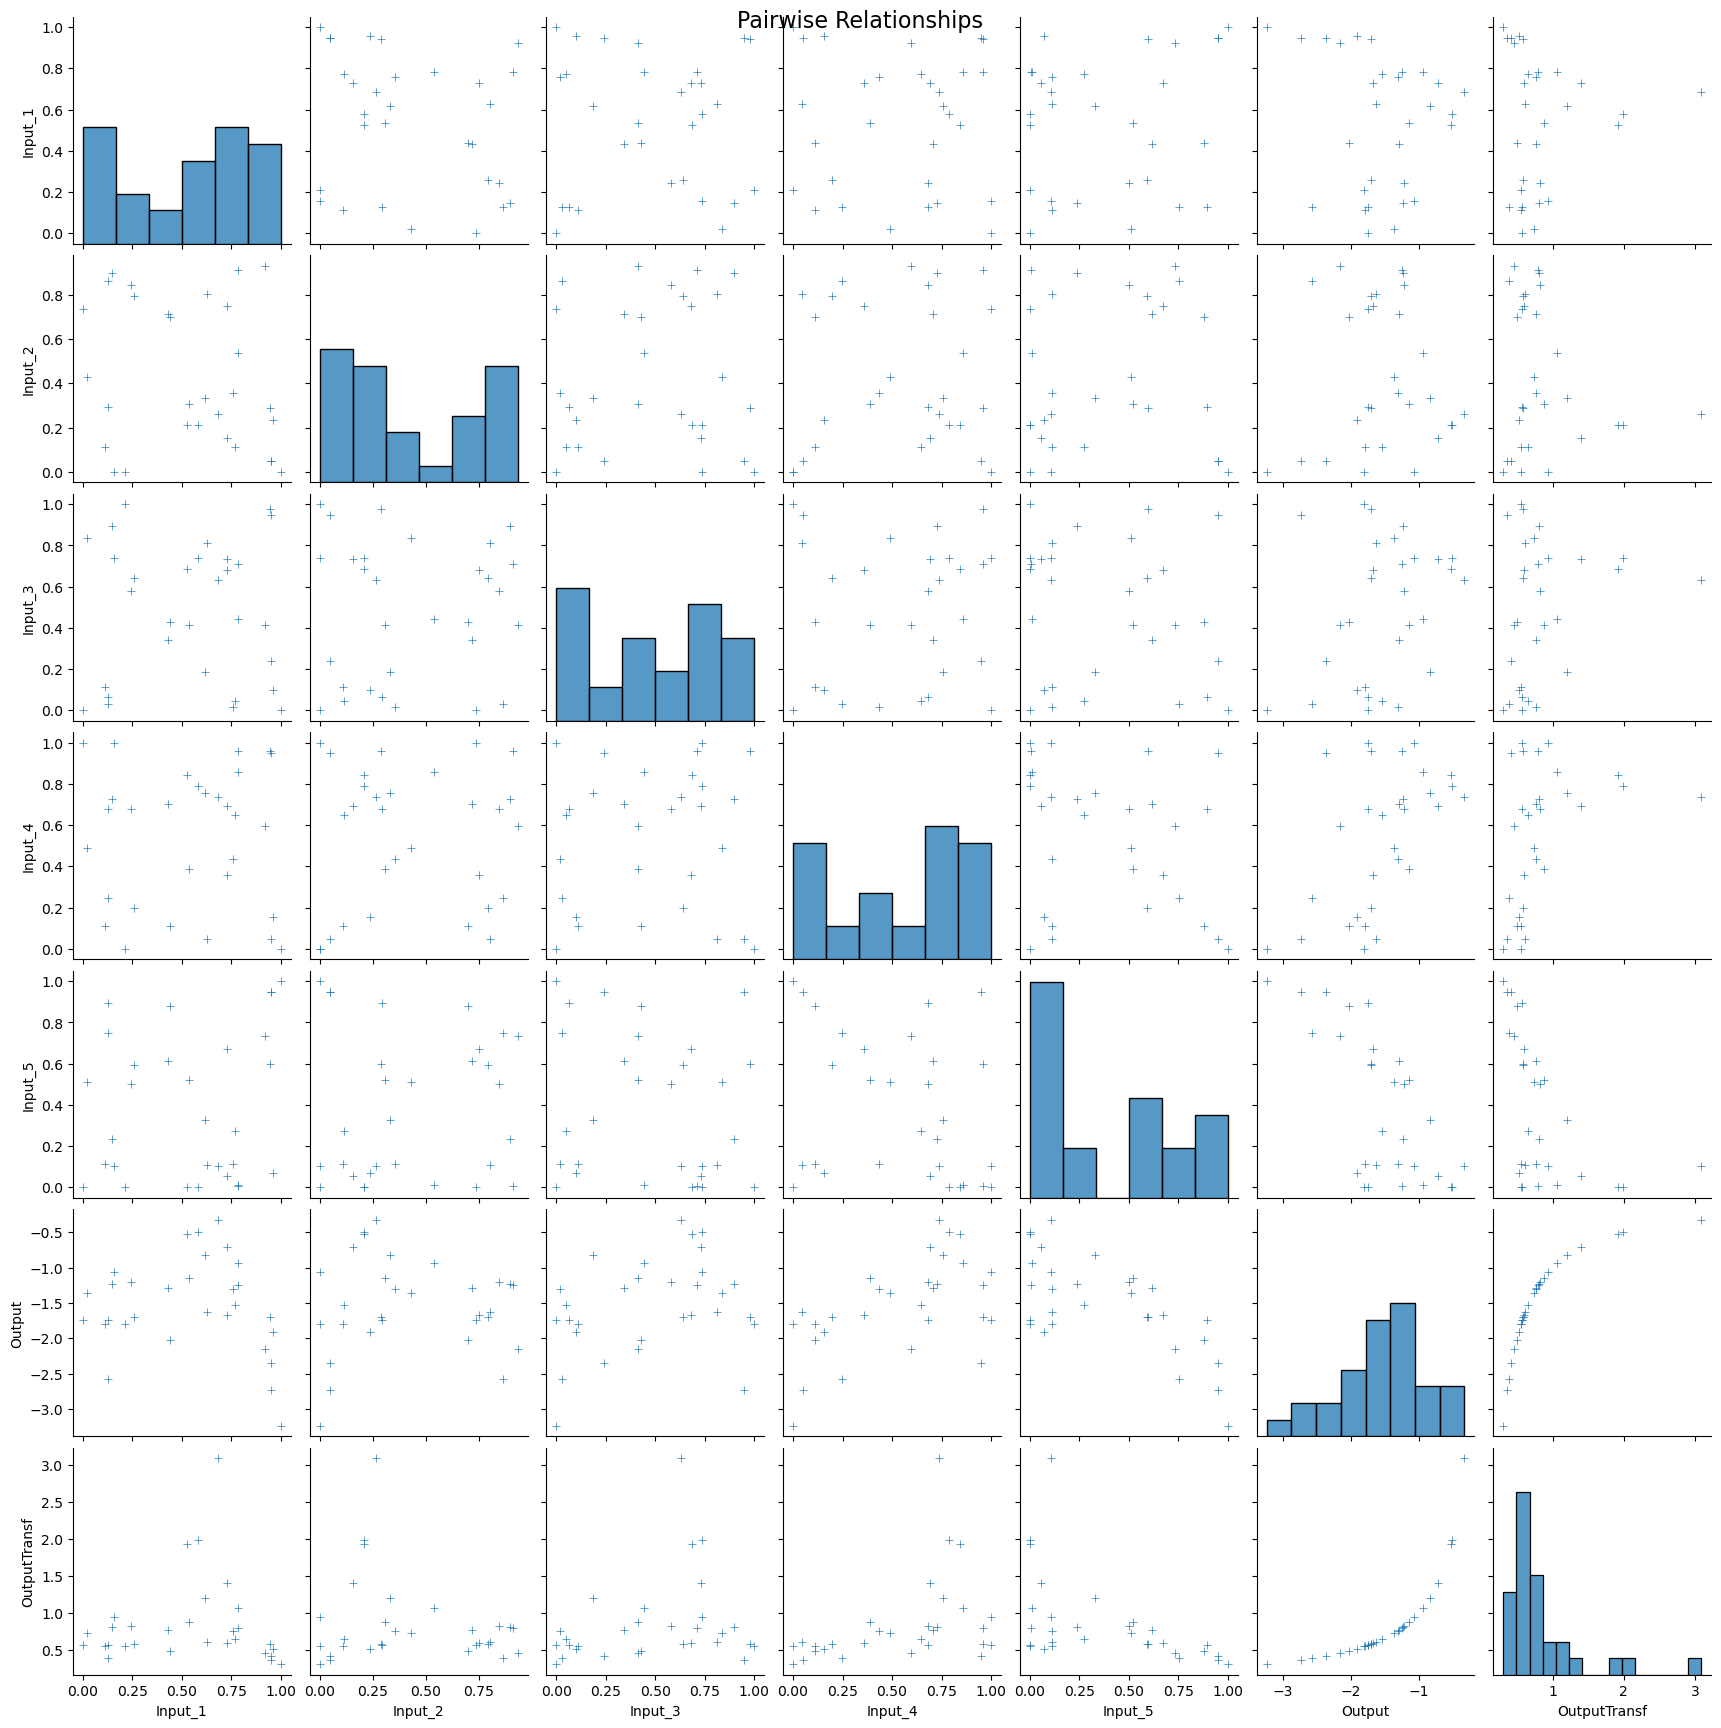

In [104]:
# Use pairplot to visualize the relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='hist', markers='+')
plt.suptitle('Pairwise Relationships', verticalalignment='baseline', fontsize=16)
plt.show()

## FOR THIS CASE ONLY


# 


## Definir las variables

In [16]:
X = df.drop(columns=['Output','OutputTransf'])
y = df[['Output']] 

#y = df[['OutputTransf']] 

# O estandarizamos datos
scaler = StandardScaler()
y = torch.tensor(scaler.fit_transform(y)).float()

In [17]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it

# Parameters of the model
#****************************************
noise_assumption = 1e-10 # noise assumption, a hyper-parameter (default 1e-10)

rbf_lengthscale = 0.5 # lengthscale parameter (default = 1), comenzaremos con 0.2 y luego ir descendiendo a 0.1 o menos
   #ARD. Automatic relevance determination
    
# define kernel of GP
kernel = RBF(length_scale=rbf_lengthscale, length_scale_bounds='fixed')

# Define a kernel with both smooth and rough components, and noise handling
#kernel = Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=0.1) + RationalQuadratic(length_scale=1.0, alpha=0.1)
#kernel=kernel + WhiteKernel(noise_level=1e-5) #ESPECIAL PARA FUNCION 1 POR LAS ANOMALIAS
#kernel = Matern(length_scale=0.1, nu=1.5, length_scale_bounds=(0.01, 1), ARD=True)

#Grid:
GG=21    #Numero de datos para cada variable en el Grid.  
dim=5    #Numero de Inputs
#******************************************************

x1 = np.linspace(0.150001, 0.999999, GG)     #Genera la primer variable. RANGO DE EXPLORACION
X_grid = np.fromiter(it.chain(*it.product(x1, repeat=dim)), dtype=float).reshape(-1,dim) #Genera todas las variables
# Convert X_grid into a DataFrame with meaningful names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)

# Fit the Gaussian process - Surrogate model
GPR_model = GaussianProcessRegressor(kernel = kernel, alpha=noise_assumption)
GPR_model.fit(X, y)

#Genera la funcion del Surrogate model para cada punto del grid
mean, std = GPR_model.predict(X_grid_df, return_std = True)

In [18]:
#Acquisition function
#######################################################

beta = 1.96
acquisition_function = mean + beta * std

#######################################################

idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"[{formatted_row}]")

[0.405000-0.405000-0.702500-0.914999-0.320001]


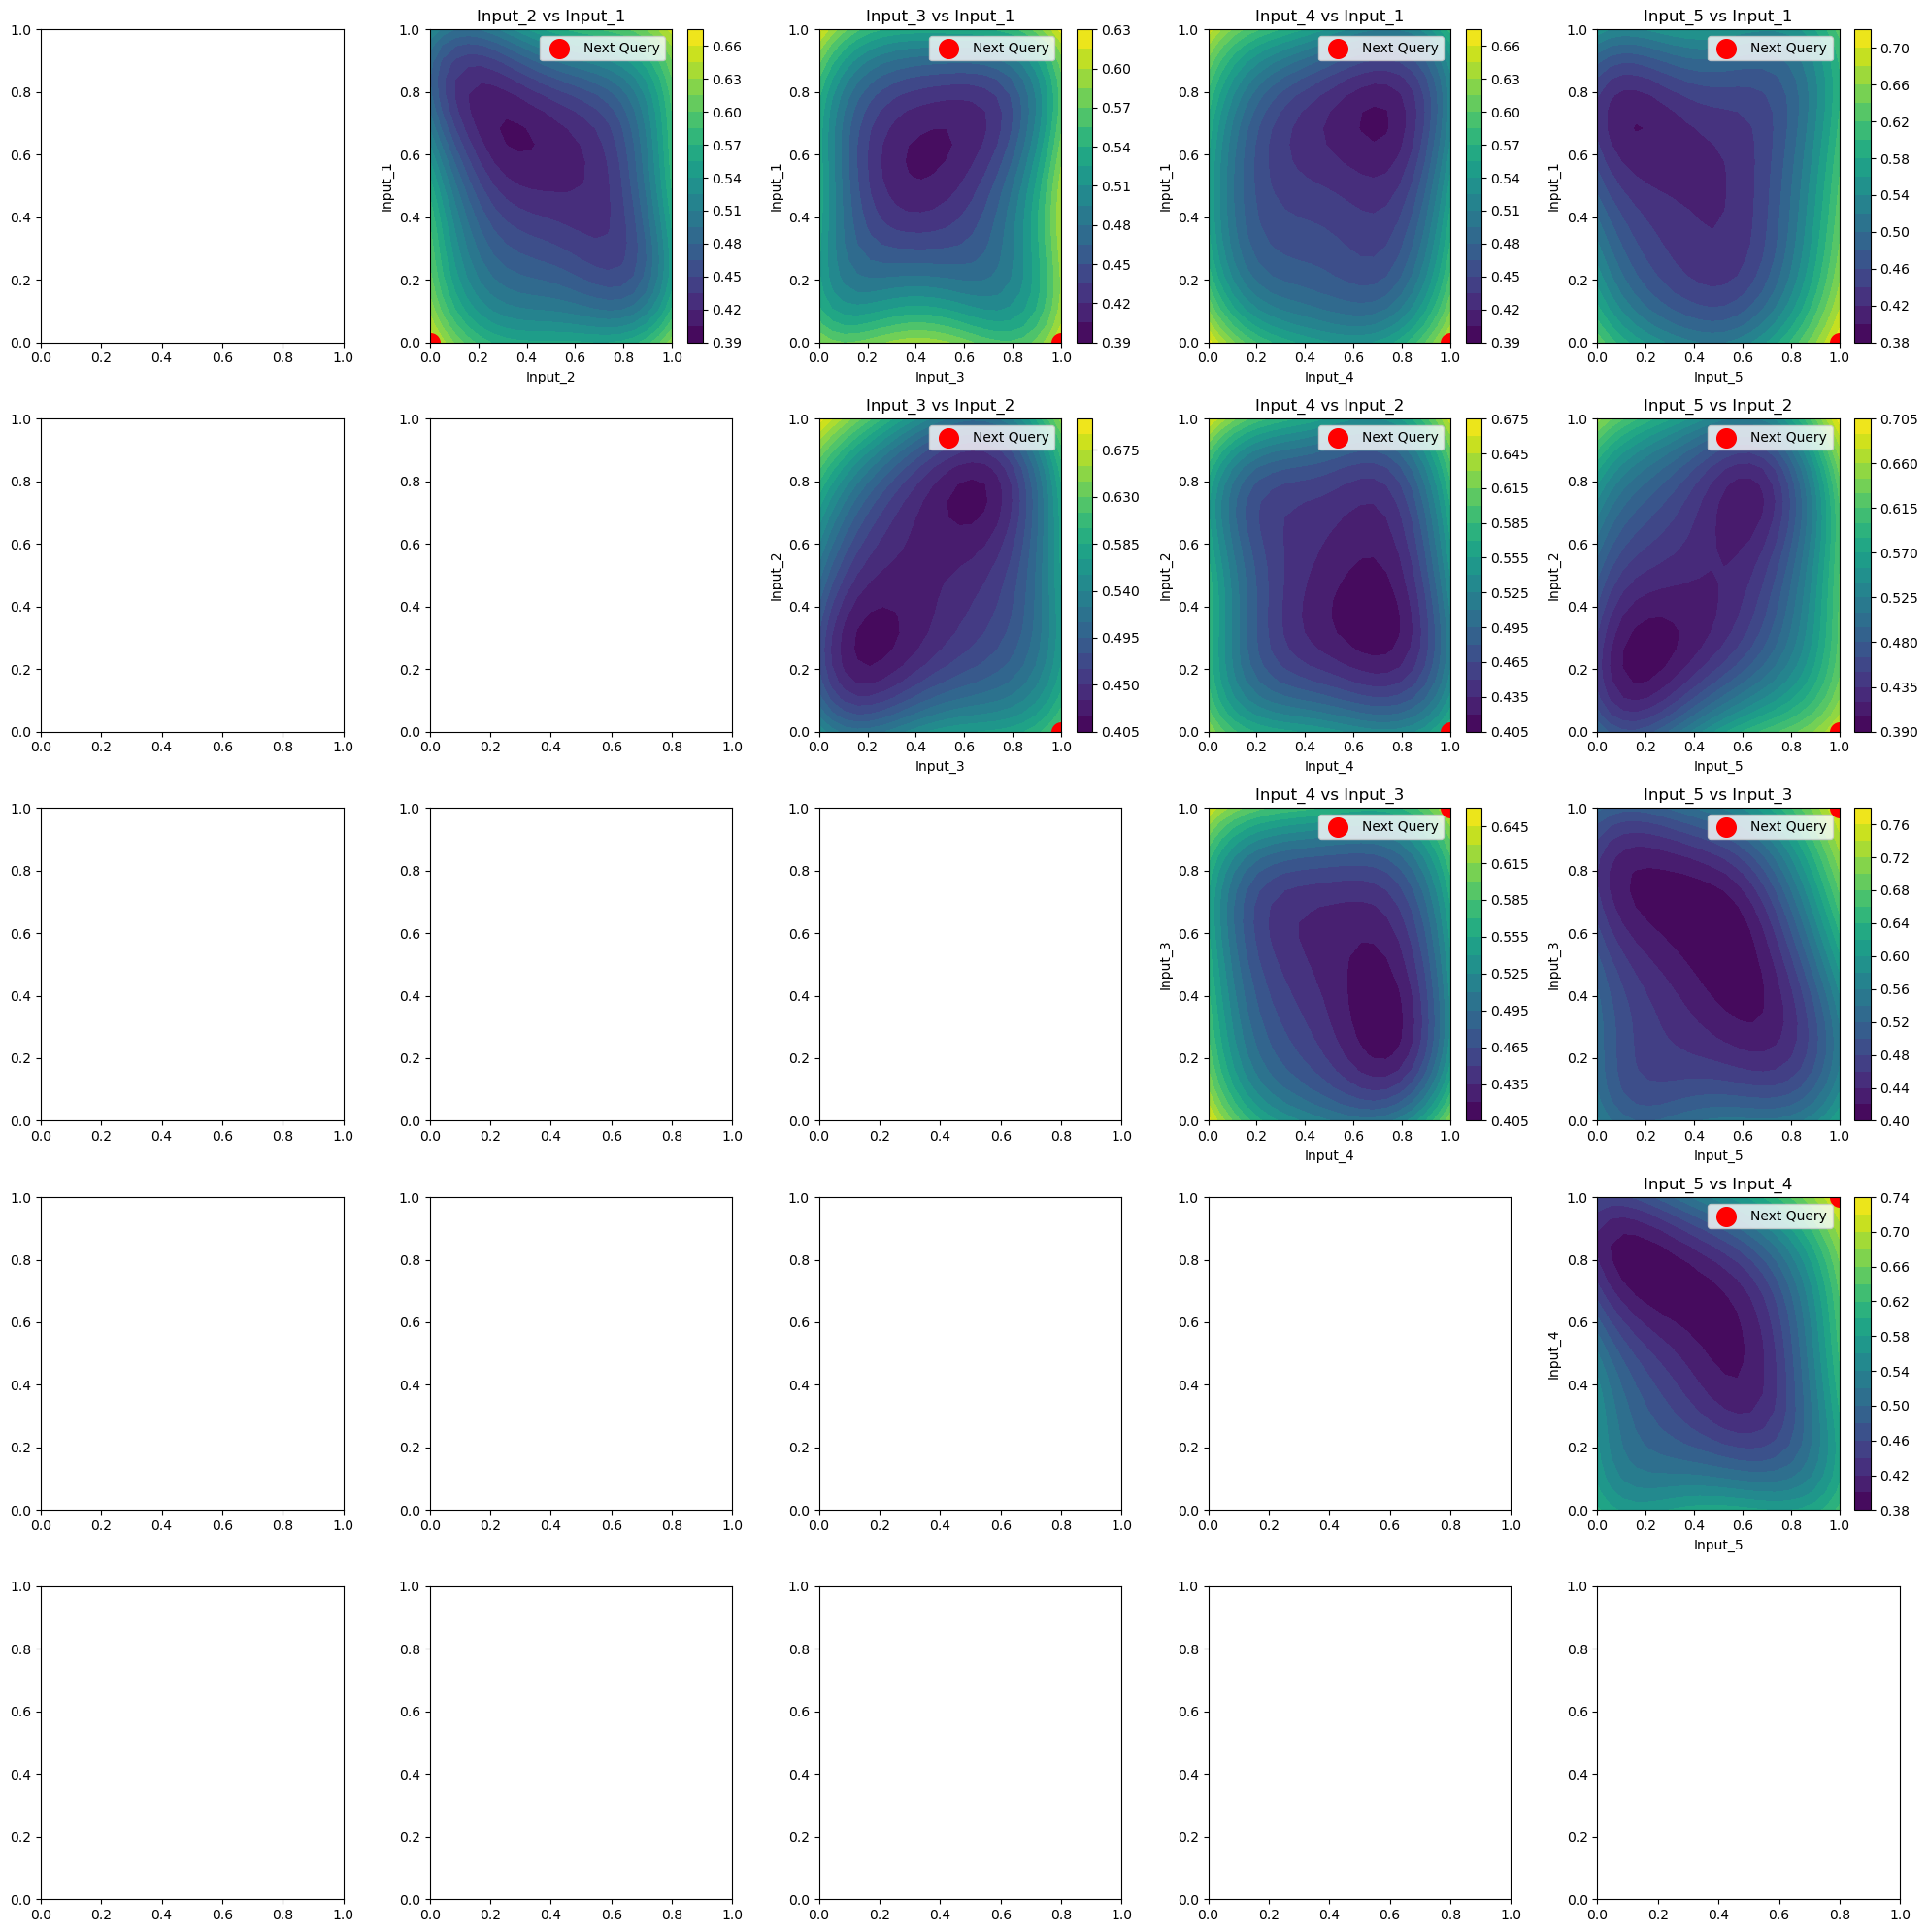

In [109]:
input_labels = X.columns.tolist()  # Correctly fetching input labels from DataFrame

# Create figure for plotting
fig, axes = plt.subplots(dim, dim, figsize=(20, 20))

for i, j in combinations(range(dim), 2):
    ax = axes[i, j] if dim > 1 else axes[max(i, j)]  # Correct indexing for subplot
    reshaped_acq_func = acquisition_function.reshape([GG]*dim)

    # Reduce all dimensions except for i and j
    axes_to_avg = tuple(k for k in range(dim) if k not in [i, j])
    reshaped_acq_func = np.mean(reshaped_acq_func, axis=axes_to_avg)
    
    # Create meshgrid for the contour plot
    x, y = np.meshgrid(np.linspace(0, 1, GG), np.linspace(0, 1, GG))
    cp = ax.contourf(x, y, reshaped_acq_func, cmap='viridis', levels=20)
    fig.colorbar(cp, ax=ax)
    
    # Plot the location of the next query: Ensure axis alignment is correct
    # Swap the indices for x and y based on their respective dimensions
    next_query_x = next_query[j]  # Using j for x-axis
    next_query_y = next_query[i]  # Using i for y-axis

    # Convert to plot scale
    next_query_x_idx = int(next_query_x * (GG - 1))
    next_query_y_idx = int(next_query_y * (GG - 1))

    # Plot the location of the next query
    ax.scatter(next_query_x, next_query_y, color='red', s=200, label='Next Query')
    ax.legend()

    ax.set_title(f'{input_labels[j]} vs {input_labels[i]}')  # Ensure correct title
    ax.set_xlabel(input_labels[j])  # x-axis should use j
    ax.set_ylabel(input_labels[i])  # y-axis should use i

plt.tight_layout()
plt.show()


In [12]:
#Acquisition function variando parametros

#######################################################
beta = 1.96
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 1.96",f"[{formatted_row}]")
#######################################################
beta = 0.00000001
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta casi CERO",f"[{formatted_row}]")
#######################################################
beta = 2.6
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 2.6",f"[{formatted_row}]")
#######################################################
acquisition_function = std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("ONLY std",f"[{formatted_row}]")
#######################################################

Beta 1.96 [0.421053-0.421053-0.684210-0.947368-0.315790]
Beta casi CERO [0.473684-0.421053-0.631579-0.736842-0.210527]
Beta 2.6 [0.368421-0.421053-0.736842-0.999999-0.368421]
ONLY std [0.000001-0.000001-0.999999-0.999999-0.999999]


### 28 Apr. Ask 1. [0.950000-0.050000-0.950000-0.050000-0.950000]

- En fase exploratoria con length scale de 0.2 y 0.3, noise entre e-4 y e-10. No cambio mucho

#### 4 May
Vamos a volver a submit el primero y voy a submit uno mas.
Pr si las dudas, voy a subir el original como segundo submit.
- [0.000500-0.736605-0.000500-0.999500-0.000500]
- [0.950000-0.050000-0.950000-0.050000-0.950000]

#### May 10
Los inputs 4 y 5 claramente son los mas correlacionados. Input 4 alto e input 5 bajo
- Lenght 1 [0.157895-0.000001-0.736842-0.999999-0.105264]
- LEnght .2 Beta 2.6 [0.999999-0.000001-0.000001-0.000001-0.999999]
- length .1 EI [0.210527-0.000001-0.999999-0.000001-0.000001]

#### MAy 14
- Beta 2.6 [0.000001-0.000001-0.999999-0.999999-0.999999] con lenght .3
- Beta 2.6 [0.999999-0.000001-0.000001-0.999999-0.999999] con lenght .2
- Beta 2.6 [0.210527-0.000001-0.999999-0.999999-0.999999] con lenght .15
- **** Vamos por exploratorio, pero voy a redondear [0.950000-0.050000-0.239474-0.950000-0.950000] (fue malo)

#### MAy 17
- [0.421053-0.315790-0.526316-0.736842-0.105264] len 1.0
- Beta 2.6 [0.000001-0.000001-0.999999-0.999999-0.999999] con lenght .3
- Beta 2.6 [0.000001-0.000001-0.999999-0.999999-0.999999] con lenght .2
- lenght .1: Beta 1.96 [0.210527-0.000001-0.999999-0.999999-0.999999], Beta 2.6 [0.157895-0.000001-0.999999-0.999999-0.999999]
******** Transformando los datos negativos originales
- Beta 2.6 [0.421053-0.368421-0.631579-0.736842-0.210527] len .3
- Beta 2.6 [0.736842-0.210527-0.631579-0.736842-0.052632] len .1
- [0.684210-0.263158-0.631579-0.736842-0.105264] con EI *** new max
- 0.526316-0.210527-0.684210-0.842105-0.000001] con log Transf

- ********* Vamos por [0.684210-0.263158-0.631579-0.736842-0.105264]** y [0.526316-0.210527-0.684210-0.842105-0.000001]

#### Jun 1
LOG LIKELIHOOD de los DATOS TRANSFORMADOS y Beta 1,96
VAMOS POR [0.578947-0.210527-0.736842-0.789473-0.000001] (bueno, pero no en maximo)

#### Jun 7
- LOG LIKELIHOOD CON DATOS TRANSFORMADOS
Beta 1.96 [0.631579-0.157895-0.736842-0.736842-0.000001]+
Beta CERO [0.631579-0.210527-0.684210-0.789473-0.000001]
Beta 2.6 [0.684210-0.157895-0.789473-0.736842-0.000001]
ONLY std [0.000001-0.000001-0.999999-0.999999-0.999999]
query EI: [0.999999-0.999999-0.999999-0.999999-0.999999]
query PI: [0.999999-0.999999-0.999999-0.000001-0.999999]

- LOG LIKELIHOOD PERO TRANSFORMACION SCALER
Beta 1.96 [0.421053-0.368421-0.578947-0.684210-0.105264]++
Beta CERO [0.473684-0.315790-0.578947-0.736842-0.157895]
Beta 2.6 [0.421053-0.368421-0.526316-0.631579-0.000001]
ONLY std [0.000001-0.999999-0.999999-0.999999-0.999999]
query EI: [0.999999-0.000001-0.000001-0.052632-0.999999]
query PI: [0.894736-0.000001-0.000001-0.000001-0.947368]

- VAMOS POR [0.631579-0.157895-0.736842-0.736842-0.000001] y [0.421053-0.368421-0.578947-0.684210-0.105264]

#### 12 jun

-Con scaler normal
- Beta 1.96 [0.421053-0.368421-0.684210-0.894736-0.315790]
- Beta CERO [0.473684-0.368421-0.631579-0.736842-0.210527]
- Beta 2.6 [0.368421-0.421053-0.684210-0.999999-0.368421]

- Con scaler normal, .15 a 1, y 21 Dim
- Beta 1.96 [0.405000-0.405000-0.660000-0.957499-0.320001]+
- Beta CERO [0.447500-0.362501-0.617500-0.787500-0.235001]++
- Beta 2.6 [0.362501-0.405000-0.702500-0.999999-0.362501]

- *** Vamos por
- [0.405000-0.405000-0.660000-0.957499-0.320001]+
- [0.447500-0.362501-0.617500-0.787500-0.235001]++

### Using EI Acquisition Function

In [83]:
from scipy.stats import norm

def acquisition_ei(gpr_model, x, best_y):
    mean, std = gpr_model.predict(x, return_std=True)
    z = (mean - best_y) / (std + 1e-9)
    return std * (z * norm.cdf(z) + norm.pdf(z))

In [84]:
#Acquisition function
#######################################################
best_y = df['Output'].max()
acquisition_function_ei=acquisition_ei(GPR_model,  X_grid, best_y)
#######################################################

idx_max_ei = np.argmax(acquisition_function_ei) #en que index esta el maximo del acquisitonm function
next_query_ei = X_grid[idx_max_ei] #que valores tienes los inputs en este maximo estimado

# Formatting the single row
formatted_row_ei = '-'.join(format(x, ".6f") for x in next_query_ei)
print(f"[{formatted_row_ei}]")

/Users/macponcho/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


[0.315790-0.421053-0.578947-0.631579-0.000001]


## Probando optimizacion de parametros LOG LIKELIHOOD

In [19]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
import itertools as it
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

X = df.drop(columns=['Output','OutputTransf'])
#y = df[['OutputTransf']] 

# O estandarizamos datos
scaler = StandardScaler()
y = df[['Output']] 
y = torch.tensor(scaler.fit_transform(y)).float()

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 1e-0, name='length_scale'),
    Real(1e-10, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    # Define kernel with given length scale
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale, length_scale_bounds='fixed') + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X, y)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=33)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")


Best length scale: 0.5896309093165684
Best noise level: 1e-10


In [20]:
# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale, length_scale_bounds='fixed') + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X, y)

# Predictions using the surrogate model
mean, std = GPR_model_best.predict(X_grid_df, return_std=True)

# Acquisition function
beta = 1.96
acquisition_function = mean + beta * std

# Find the next query point
idx_max = np.argmax(acquisition_function)
next_query = X_grid[idx_max]

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"Next query point with Beta 1.96: [{formatted_row}]")
print("     ")


Next query point with Beta 1.96: [0.405000-0.405000-0.660000-0.957499-0.320001]
     


In [21]:
#Acquisition function variando parametros

#######################################################
beta = 1.96
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 1.96",f"[{formatted_row}]")
#######################################################
beta = 0.00000001
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta CERO",f"[{formatted_row}]")
#######################################################
beta = 2.6
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 2.6",f"[{formatted_row}]")
#######################################################
acquisition_function = std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("ONLY std",f"[{formatted_row}]")
#######################################################

# Acquisition function choices

acquisition_function = gaussian_ei(X_grid, model=GPR_model_best, xi=0.01)

# Find the next query point
idx_max = np.argmax(acquisition_function)
next_query = X_grid[idx_max]

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"query EI: [{formatted_row}]")

# */*******************************************************************************

acquisition_function = gaussian_pi(X_grid, model=GPR_model_best, xi=0.01)

# Find the next query point
idx_max = np.argmax(acquisition_function)
next_query = X_grid[idx_max]

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"query PI: [{formatted_row}]")

Beta 1.96 [0.405000-0.405000-0.660000-0.957499-0.320001]
Beta CERO [0.447500-0.362501-0.617500-0.787500-0.235001]
Beta 2.6 [0.362501-0.405000-0.702500-0.999999-0.362501]
ONLY std [0.150001-0.999999-0.999999-0.999999-0.999999]
query EI: [0.999999-0.150001-0.150001-0.150001-0.999999]
query PI: [0.150001-0.787500-0.150001-0.192501-0.702500]
